In [1]:
#!pip install pandas numpy matplotlib seaborn scikit-learn plotly plotly_express scipy
#!pip install nbformat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### <center> Configuraciones </center>

In [3]:
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

### <center> Carga de datos </center>

In [4]:
df = pd.read_csv(r'C:\Users\Usuario\Documents\GitHub\Performance\Data\student_habits_performance.csv')

In [5]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
df['internet_quality'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [8]:
df.isnull().sum() / len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

##### Crea una función que selecciones las columnas que son objeto y nos devuelva los valores unicos que tiene cada uno de ellos

In [9]:
def unique_values(df, cols):
    for col in cols:
        if df[col].dtype == 'object':
            print(f"Unique values in {col}:")
            print(df[col].unique()) 
            print("\n")

#No usamos la primera columna porque es el id del estudiante y no tiene sentido ver los valores únicos de esas columnas
unique_values(df, df.columns[1:])

Unique values in gender:
['Female' 'Male' 'Other']


Unique values in part_time_job:
['No' 'Yes']


Unique values in diet_quality:
['Fair' 'Good' 'Poor']


Unique values in parental_education_level:
['Master' 'High School' 'Bachelor' nan]


Unique values in internet_quality:
['Average' 'Poor' 'Good']


Unique values in extracurricular_participation:
['Yes' 'No']




In [10]:
df['parental_education_level'].fillna('sin datos', inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

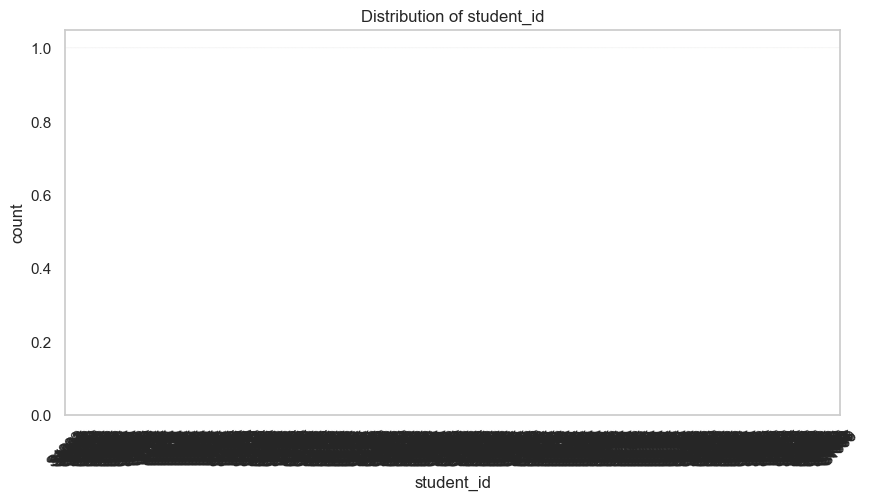

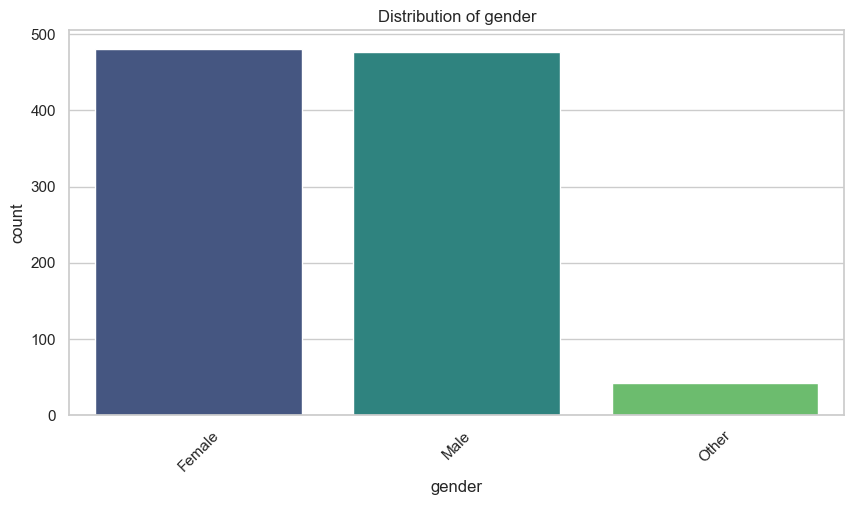

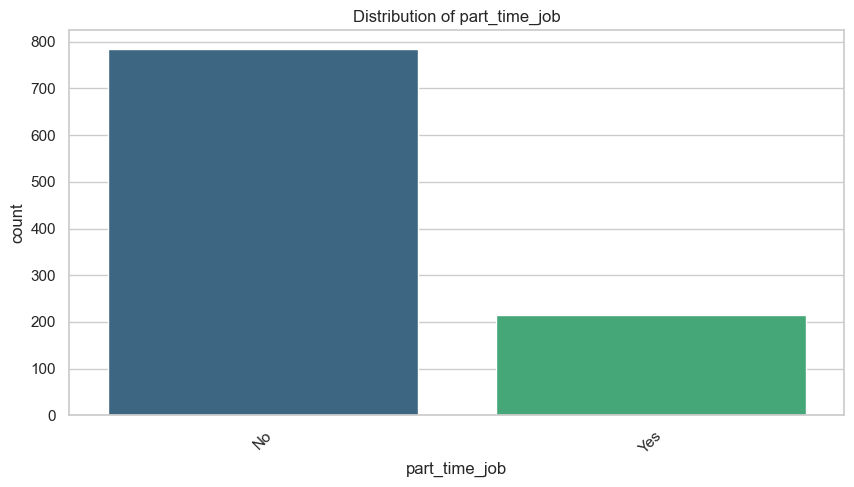

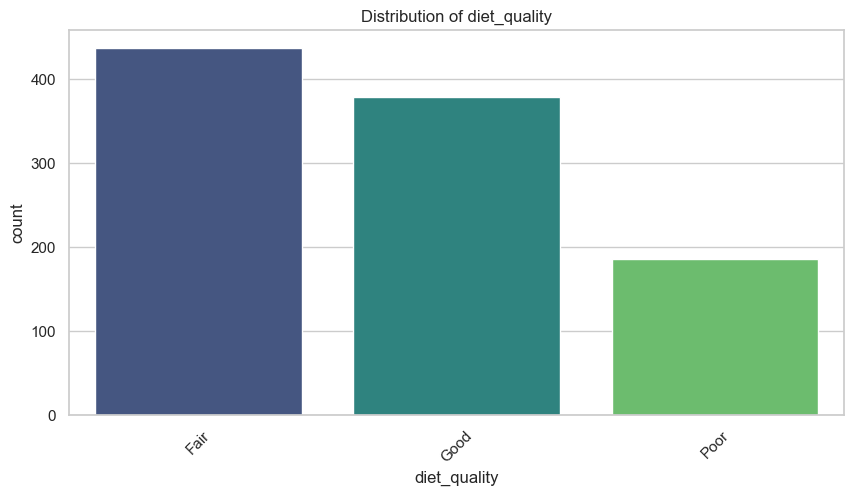

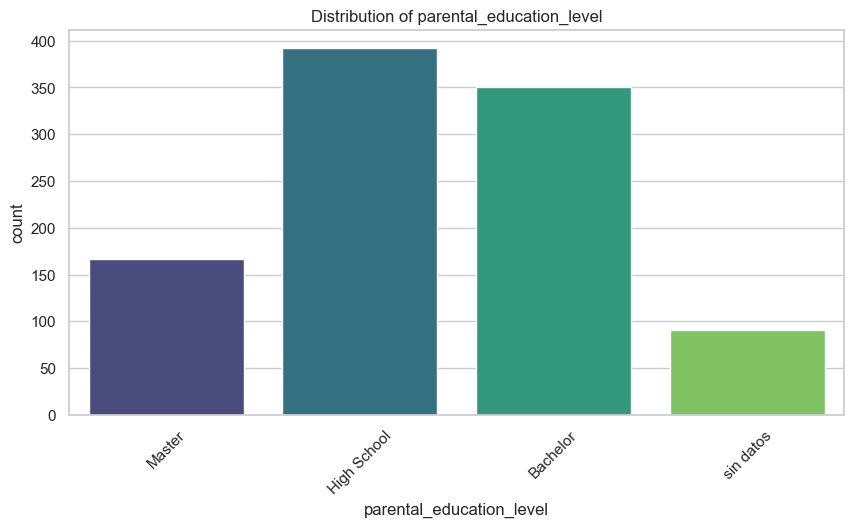

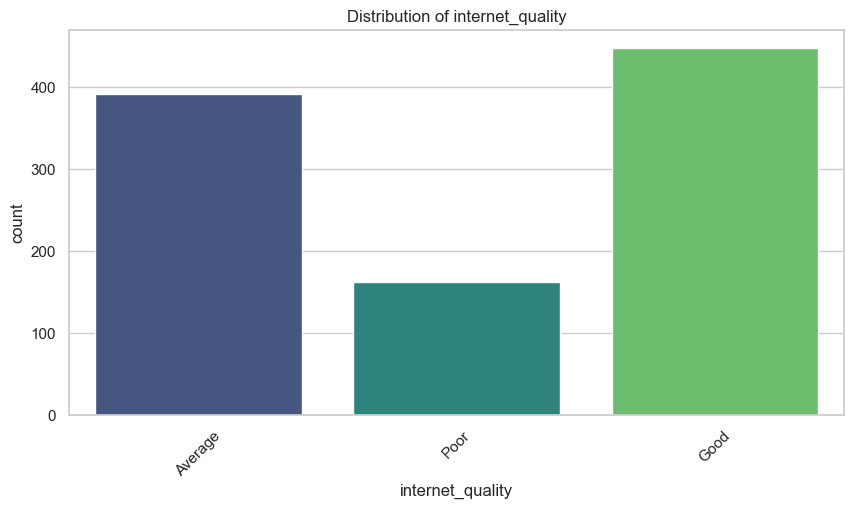

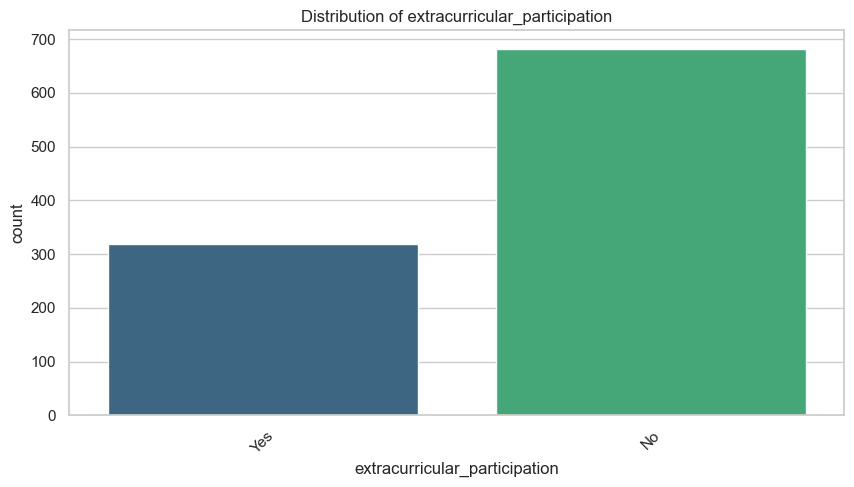

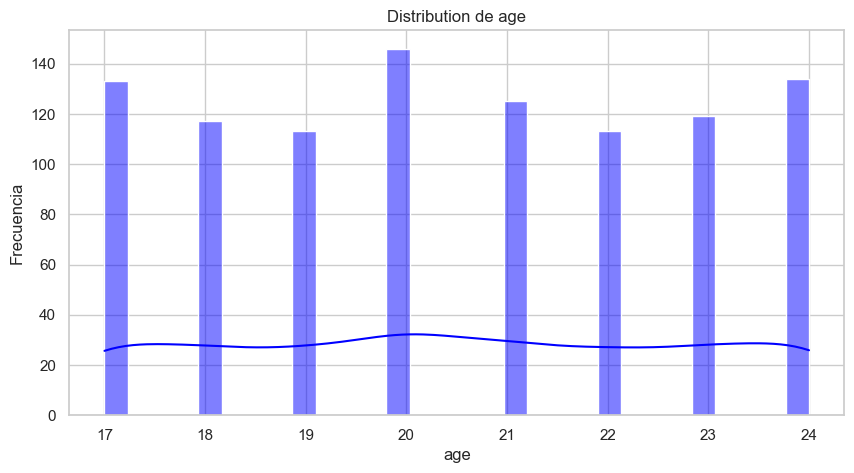

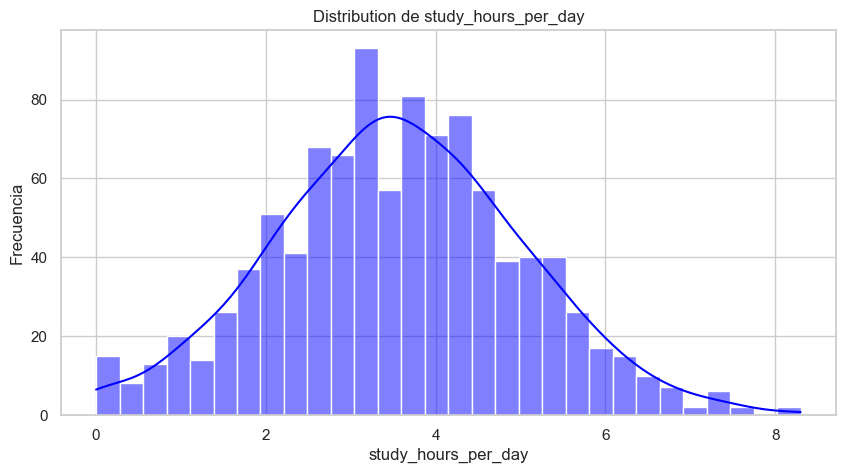

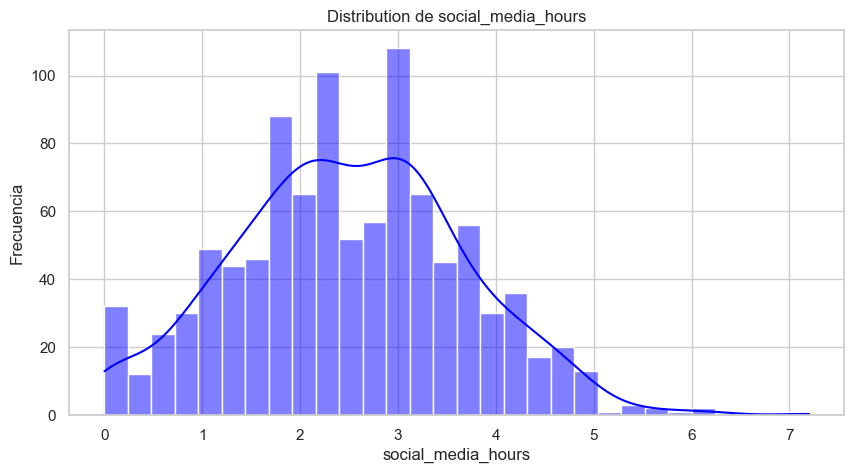

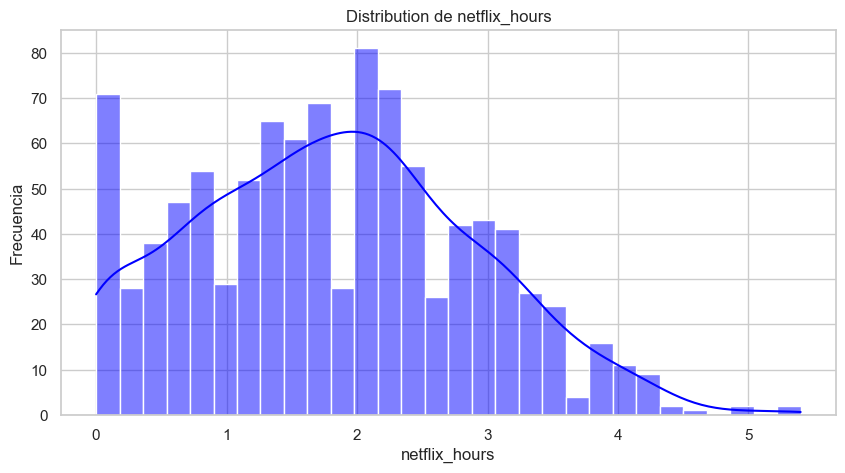

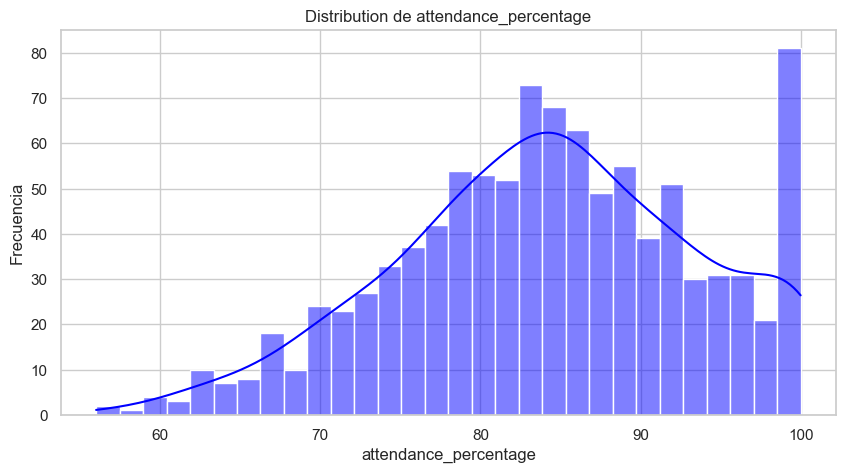

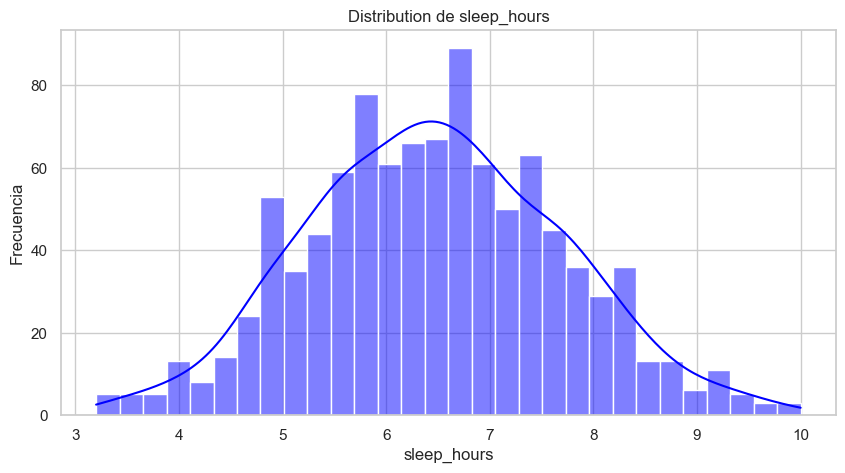

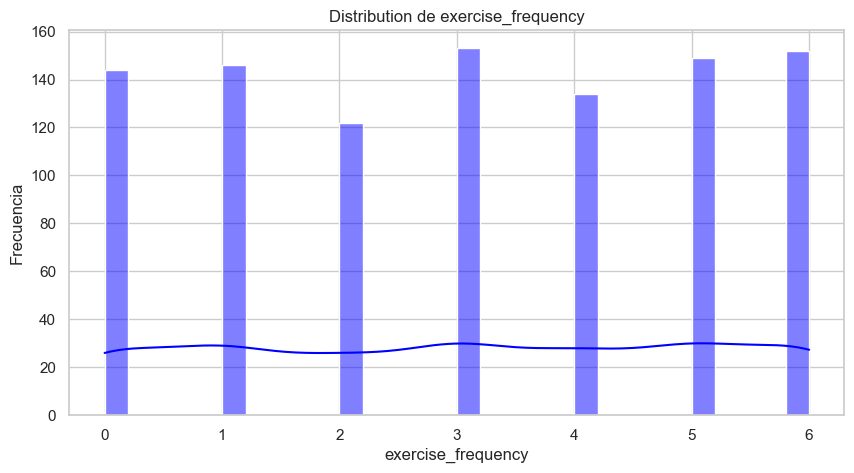

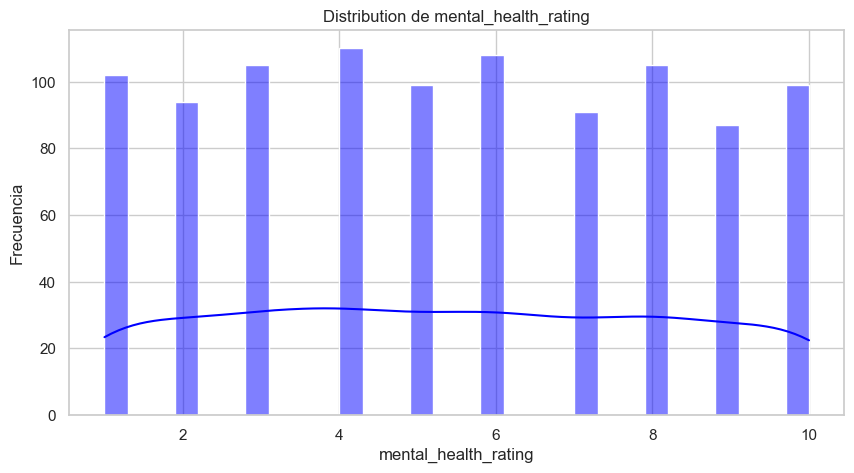

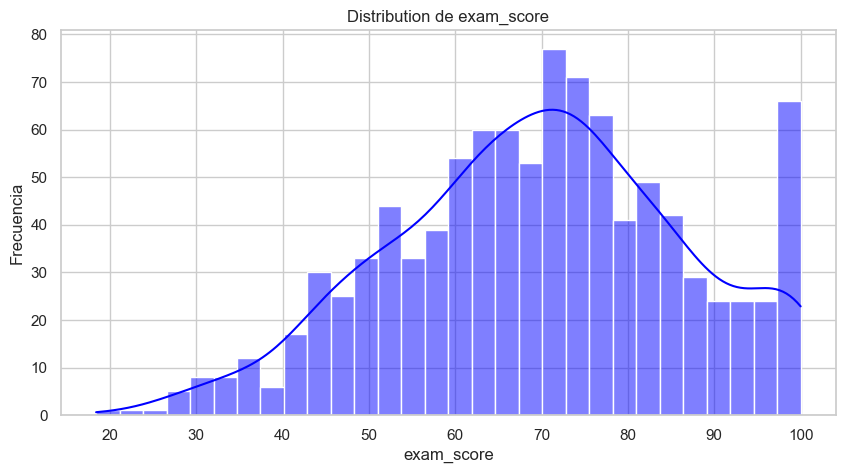

In [12]:
def plot_categorical(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}') 
    plt.xticks(rotation=45)
    plt.show()

def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical(df, col)
for col in numerical_cols:
    plot_numerical_distribution(df, col)

### <center> EDA </center>

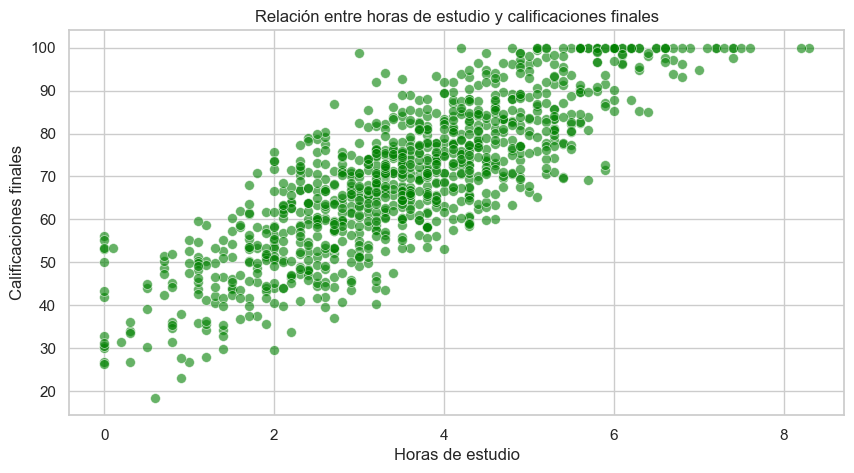

In [13]:
#Relación entre las horas de estudio y calificaciones
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', s= 50,  alpha=0.6, color='green') 

#Etiquetas y estilo
plt.title('Relación entre horas de estudio y calificaciones finales')   
plt.xlabel('Horas de estudio')
plt.ylabel('Calificaciones finales')
plt.show()


In [14]:
# Create an interactive scatter plot
# Create the scatter plot
fig = px.scatter(df,
                 x='study_hours_per_day',
                 y='exam_score',
                 color='parental_education_level',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Study Hours vs Exam Scores by Parental Education Level',
                 labels={
                     'study_hours_per_day': 'Study Hours per Day',
                     'exam_score': 'Exam Score (%)',
                     'parental_education_level': 'Parental Education'
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['study_hours_per_day'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Education Level"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Study Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%",
        "Education Level: %{color}",
        "<extra></extra>"
    ])
)
 
fig.show()

In [15]:
# Conclusiones:
# 1. La mayoría de los estudiantes estudian entre 1 y 3 horas al día.
# 2. La mayoría de los estudiantes tienen un puntaje de examen entre 60 y 80.
# 3. Hay una relación positiva entre las horas de estudio y el puntaje del examen, lo que sugiere que estudiar más horas puede llevar a mejores calificaciones.
# 4. Sin embargo, hay algunos estudiantes que estudian muchas horas pero aún así obtienen calificaciones bajas, lo que sugiere que la calidad del estudio también es importante.
# 5. La mayoría de los estudiantes tienen acceso a internet de calidad, lo que puede influir en su rendimiento académico.
# 6. La mayoría de los estudiantes tienen padres con educación secundaria o universitaria, lo que puede influir en su rendimiento académico.
# 7. La mayoría de los estudiantes tienen un ambiente de estudio tranquilo, lo que puede influir en su rendimiento académico.
# 8. La mayoría de los estudiantes tienen acceso a recursos educativos, lo que puede influir en su rendimiento académico.

Relación entre horas en redes sociales y calificaciones

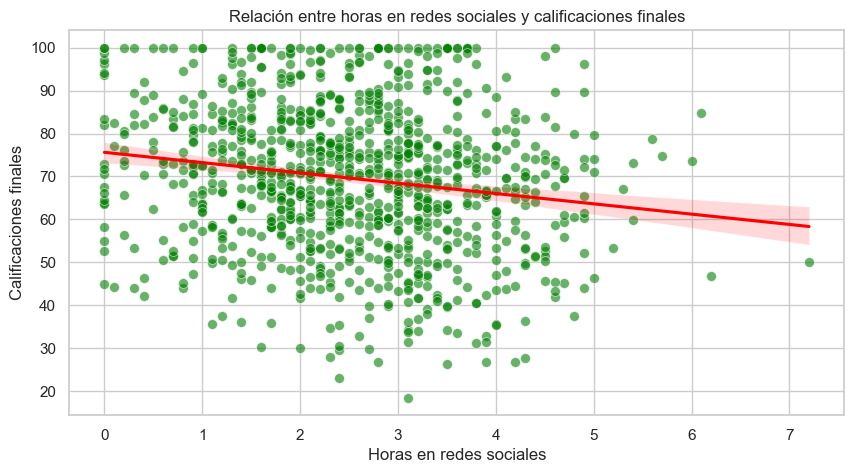

In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='social_media_hours', y='exam_score', s= 50,  alpha=0.6, color='green') 

#línea de regresión
sns.regplot(data=df, x='social_media_hours', y='exam_score', scatter=False, color='red')

#Etiquetas y estilo
plt.title('Relación entre horas en redes sociales y calificaciones finales')   
plt.xlabel('Horas en redes sociales')
plt.ylabel('Calificaciones finales')
plt.show()

In [17]:
#Conclusiones:
# 1. La mayoría de los estudiantes pasan entre 0 y 3 horas al día en redes sociales.        


Relación entre horas de Netflix y calificaciones

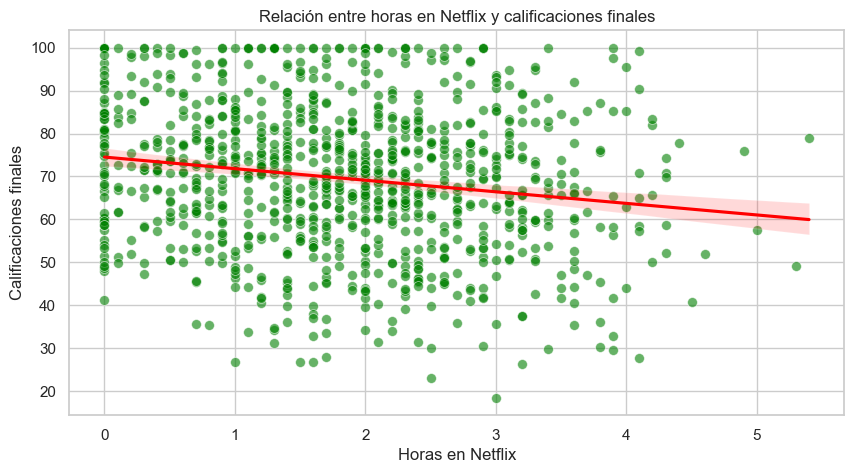

In [18]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='netflix_hours', y='exam_score', s= 50,  alpha=0.6, color='green') 

#línea de regresión
sns.regplot(data=df, x='netflix_hours', y='exam_score', scatter=False, color='red')

#Etiquetas y estilo
plt.title('Relación entre horas en Netflix y calificaciones finales')   
plt.xlabel('Horas en Netflix')
plt.ylabel('Calificaciones finales')
plt.show()

Relación entre horas de sueño y calificaciones

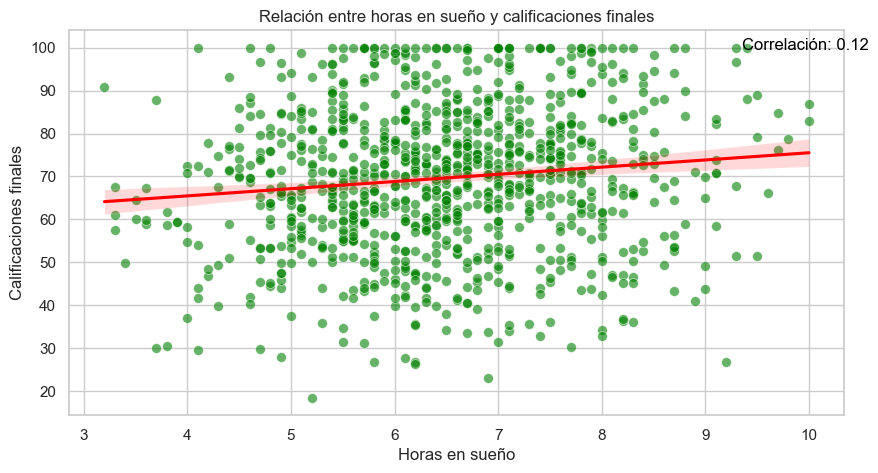

In [19]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='sleep_hours', y='exam_score', s= 50,  alpha=0.6, color='green') 

#línea de regresión
sns.regplot(data=df, x='sleep_hours', y='exam_score', scatter=False, color='red')

#correlación
correlation = df['sleep_hours'].corr(df['exam_score'])  
plt.annotate(f'Correlación: {correlation:.2f}', xy=(0.95, 0.95), xycoords='axes fraction', 
             fontsize=12, ha='center', color='black')

#Etiquetas y estilo
plt.title('Relación entre horas en sueño y calificaciones finales')   
plt.xlabel('Horas en sueño')
plt.ylabel('Calificaciones finales')
plt.show()

Compara calificaciones por género


In [20]:
# Create an interactive scatter plot
# Create the scatter plot
'''fig = px.scatter(df,
                 x='gender',
                 y='exam_score',
                 color='parental_education_level',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Study Hours vs Exam Scores by Parental Education Level',
                 labels={
                     'study_hours_per_day': 'Study Hours per Day',
                     'exam_score': 'Exam Score (%)',
                     'parental_education_level': 'Parental Education'
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['study_hours_per_day'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Education Level"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Study Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%",
        "Education Level: %{color}",
        "<extra></extra>"
    ])
)
 
fig.show()'''

'fig = px.scatter(df,\n                 x=\'gender\',\n                 y=\'exam_score\',\n                 color=\'parental_education_level\',\n                 hover_data=[\'student_id\', \'age\', \'gender\', \'mental_health_rating\'],\n                 title=\'Study Hours vs Exam Scores by Parental Education Level\',\n                 labels={\n                     \'study_hours_per_day\': \'Study Hours per Day\',\n                     \'exam_score\': \'Exam Score (%)\',\n                     \'parental_education_level\': \'Parental Education\'\n                 },\n                 height=600,\n                 width=900,\n                 trendline="ols"\n                )\n\n# Calculate correlation\ncorrelation = df[\'study_hours_per_day\'].corr(df[\'exam_score\'])\ncorrelation_text = f\'Correlation: {correlation:.2f}\'\n\n# Update layout for better visibility\nfig.update_layout(\n    plot_bgcolor=\'white\',\n    legend=dict(\n        bgcolor=\'rgba(255,255,255,0.8)\',\n        b

 
### Compara calificaciones por trabajo de medio tiempo

ValueError: could not convert string to float: 'No'

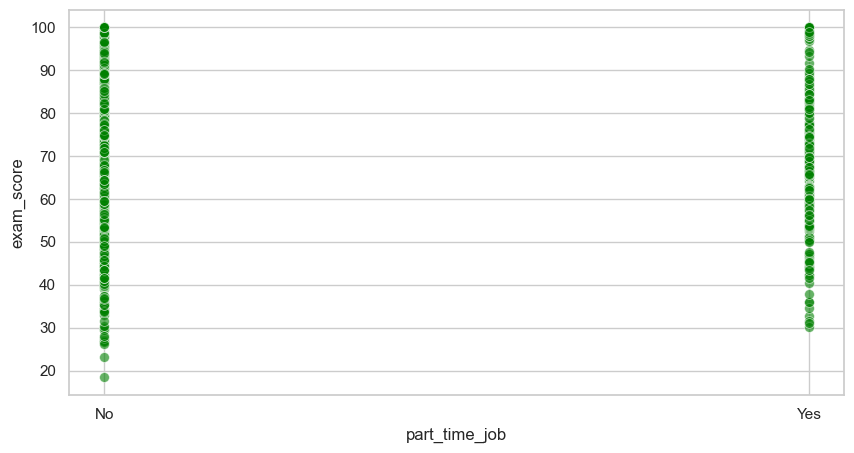

In [21]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='part_time_job', y='exam_score', s= 50,  alpha=0.6, color='green') 

#línea de regresión
#sns.regplot(data=df, x='part_time_job', y='exam_score', scatter=False, color='red')

#correlación
correlation = df['part_time_job'].corr(df['exam_score'])  
plt.annotate(f'Correlación: {correlation:.2f}', xy=(0.95, 0.95), xycoords='axes fraction', 
             fontsize=12, ha='center', color='black')

#Etiquetas y estilo
plt.title('Relación entre horas en sueño y calificaciones finales')   
plt.xlabel('Horas en sueño')
plt.ylabel('Calificaciones finales')
plt.show()

 
### Compara calificaciones por calidad de dieta

ValueError: could not convert string to float: 'Fair'

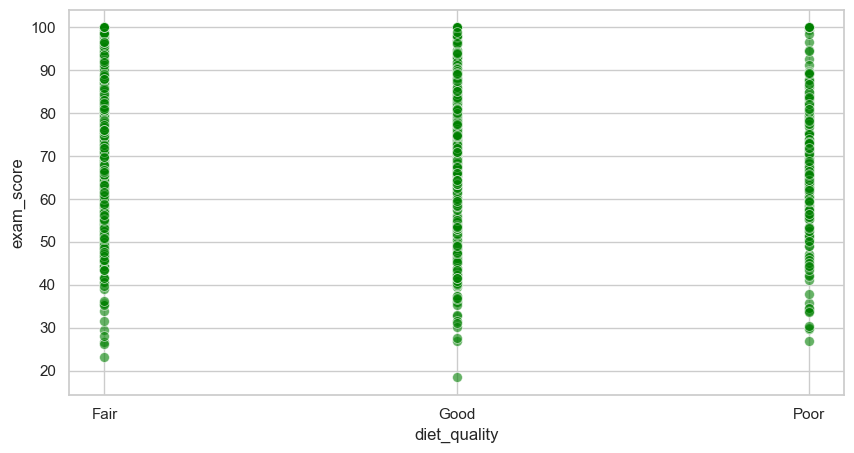

In [23]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='diet_quality', y='exam_score', s= 50,  alpha=0.6, color='green') 

#línea de regresión
#sns.regplot(data=df, x='diet_quality', y='exam_score', scatter=False, color='red')

#correlación
correlation = df['diet_quality'].corr(df['exam_score'])  
plt.annotate(f'Correlación: {correlation:.2f}', xy=(0.95, 0.95), xycoords='axes fraction', 
             fontsize=12, ha='center', color='black')

#Etiquetas y estilo
plt.title('Relación entre horas en sueño y calificaciones finales')   
plt.xlabel('Horas en sueño')
plt.ylabel('Calificaciones finales')
plt.show()

### Compara calificaciones por participación extracurricular

ValueError: Incorrect style argument: 'round,pad=0,3'

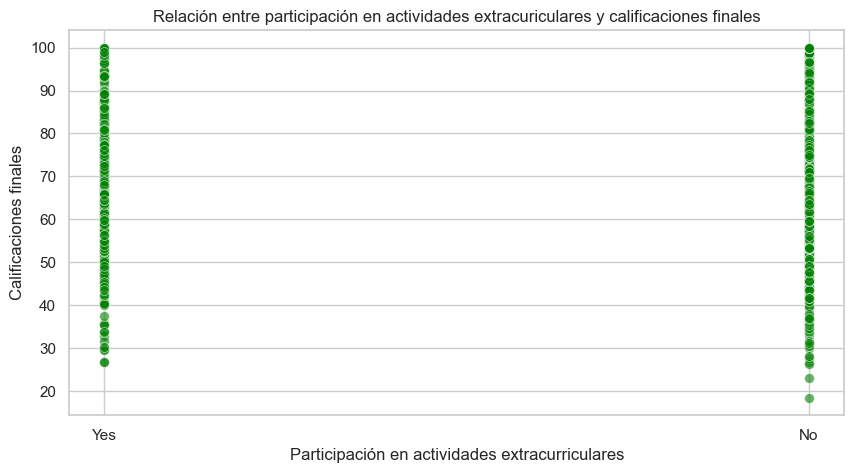

In [31]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='extracurricular_participation', y='exam_score', s= 50,  alpha=0.6, color='green') 
plt.title('Relación entre participación en actividades extracuriculares y calificaciones finales')   
plt.xlabel('Participación en actividades extracurriculares')
plt.ylabel('Calificaciones finales')

#línea de regresión
#sns.regplot(data=df, x='extracurricular_participation', y='exam_score', scatter=False, color='red')

#Añadimos un cuadro que muestre la mediana
mediana = df.groupby('extracurricular_participation')['exam_score'].median()
for i, median in enumerate(mediana):
    plt.text(i, median + 1, f'{median:.1f}', ha='center',bbox=dict(boxstyle='round,pad=0,3', fc='white', ec='black', lw=1, alpha=0.5))

#Etiquetas y estilo

plt.show()